In [17]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess
from lavis.processors import load_processor

#### Load an example image and text

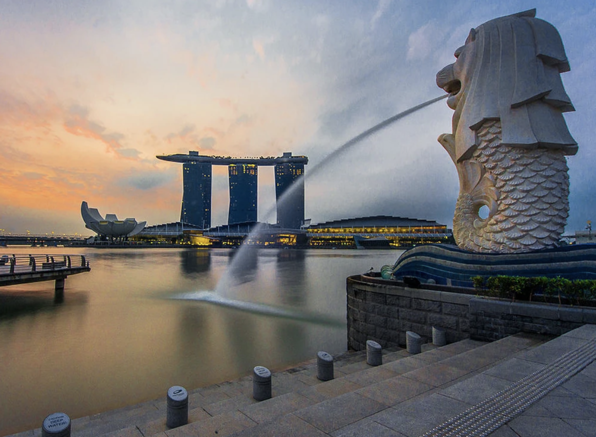

In [18]:
raw_image = Image.open("../docs/_static/merlion.png").convert("RGB")
display(raw_image.resize((596, 437)))

In [19]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
caption = "merlion in Singapore"

#### Load model and preprocessors

In [21]:
# model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", "base", device=device, is_eval=True)
model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", "large", device=device, is_eval=True)

#### Preprocess image and text inputs

In [22]:
img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
txt = text_processors["eval"](caption)

#### Compute image-text matching (ITM) score

In [23]:
itm_output = model({"image": img, "text_input": txt}, match_head="itm")
itm_scores = torch.nn.functional.softmax(itm_output, dim=1)
print(f'The image and text are matched with a probability of {itm_scores[:, 1].item():.3%}')

The image and text are matched with a probability of 99.466%


In [24]:
itc_score = model({"image": img, "text_input": txt}, match_head='itc')
print('The image feature and text feature has a cosine similarity of %.4f'%itc_score)

The image feature and text feature has a cosine similarity of 0.4474
